In [17]:
# Interim Improvement Notebook: Expand Asset Universe

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [19]:
# -----------------------------
# 1. Data Acquisition
# -----------------------------
assets = ["TSLA", "BND", "SPY", "GLD", "EFA", "DBC"]  # expanded asset universe
start_date = "2015-01-01"
end_date = "2025-07-31"

df = yf.download(assets, start=start_date, end=end_date)
print(df.head())
print(df.columns)
df = df.ffill().dropna()

print("Data Shape:", df.shape)
df.head()



C:\Users\hp\AppData\Local\Temp\ipykernel_2004\2102286597.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(assets, start=start_date, end=end_date)
[*********************100%***********************]  6 of 6 completed

Price           Close                                                \
Ticker            BND        DBC        EFA         GLD         SPY   
Date                                                                  
2015-01-02  61.378403  15.931044  44.573959  114.080002  171.568024   
2015-01-05  61.556618  15.703833  43.521778  115.800003  168.469543   
2015-01-06  61.734859  15.555272  43.028801  117.120003  166.882721   
2015-01-07  61.771938  15.459143  43.507061  116.430000  168.962357   
2015-01-08  61.675453  15.520317  44.095695  115.940002  171.960541   

Price                       High                                    ...  \
Ticker           TSLA        BND        DBC        EFA         GLD  ...   
Date                                                                ...   
2015-01-02  14.620667  61.408109  16.062127  44.978641  114.800003  ...   
2015-01-05  14.006000  61.578896  15.861133  43.985322  116.000000  ...   
2015-01-06  14.085333  61.920517  15.756268  43.639505  

Price           Close                                                \
Ticker            BND        DBC        EFA         GLD         SPY   
Date                                                                  
2015-01-02  61.378403  15.931044  44.573959  114.080002  171.568024   
2015-01-05  61.556618  15.703833  43.521778  115.800003  168.469543   
2015-01-06  61.734859  15.555272  43.028801  117.120003  166.882721   
2015-01-07  61.771938  15.459143  43.507061  116.430000  168.962357   
2015-01-08  61.675453  15.520317  44.095695  115.940002  171.960541   

Price                       High                                    ...  \
Ticker           TSLA        BND        DBC        EFA         GLD  ...   
Date                                                                ...   
2015-01-02  14.620667  61.408109  16.062127  44.978641  114.800003  ...   
2015-01-05  14.006000  61.578896  15.861133  43.985322  116.000000  ...   
2015-01-06  14.085333  61.920517  15.756268  43.639505  117.500000  ...   
2015-01-07  14.063333  61.846200  15.607704  43.580639  116.879997  ...   
2015-01-08  14.041333  61.720009  15.520317  44.250210  116.870003  ...   

Price            Open                                      Volume           \
Ticker            EFA         GLD         SPY       TSLA      BND      DBC   
Date                                                                         
2015-01-02  44.919777  112.489998  172.361441  14.858000  2218800  1967300   
2015-01-05  43.948533  114.779999  170.515696  14.303333  5820100  1827500   
2015-01-06  43.484988  116.220001  168.778537  14.004000  3887600  1843100   
2015-01-07  43.374619  116.470001  168.219060  14.223333  2433400  1868400   
2015-01-08  43.771950  116.449997  170.382079  14.187333  1873400  1409400   

Price                                                
Ticker           EFA       GLD        SPY      TSLA  
Date                                                 
2015-01-02  24674800   7109600  121465900  71466000  
2015-01-05  28468200   8177400  169632600  80527500  
2015-01-06  21711600  11238300  209151400  93928500  
2015-01-07  19048900   6434200  125346700  44526000  
2015-01-08  16680000   7033700  147217800  51637500  

[5 rows x 30 columns]

C:\Users\hp\AppData\Local\Temp\ipykernel_2004\4151358425.py:6: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.index, df[col], label=col)


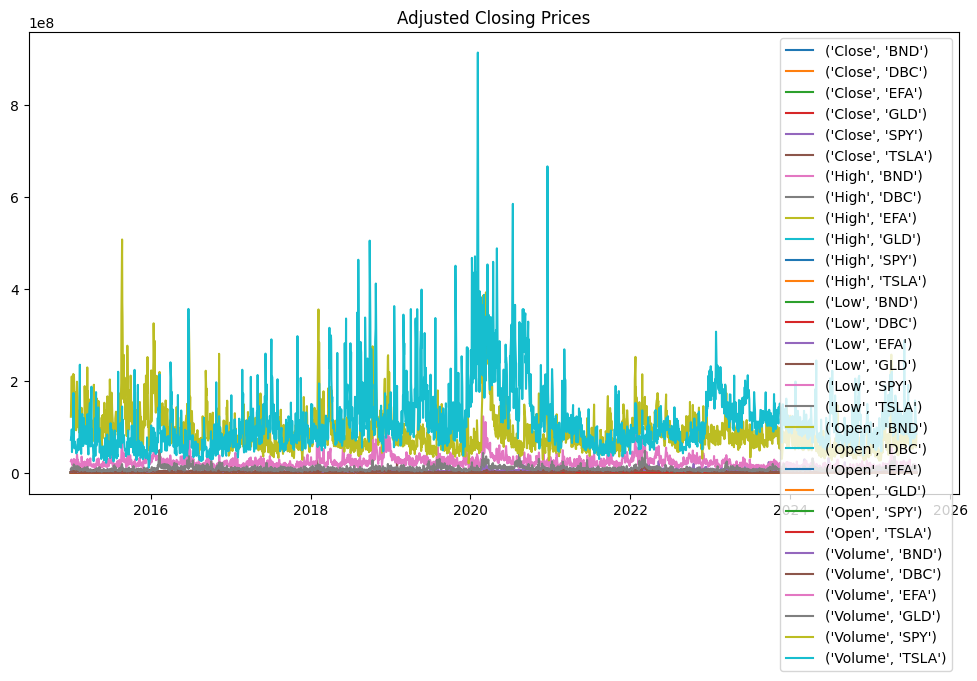

d:\GitHub\10acadamy\FinSight-TimeSeries\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


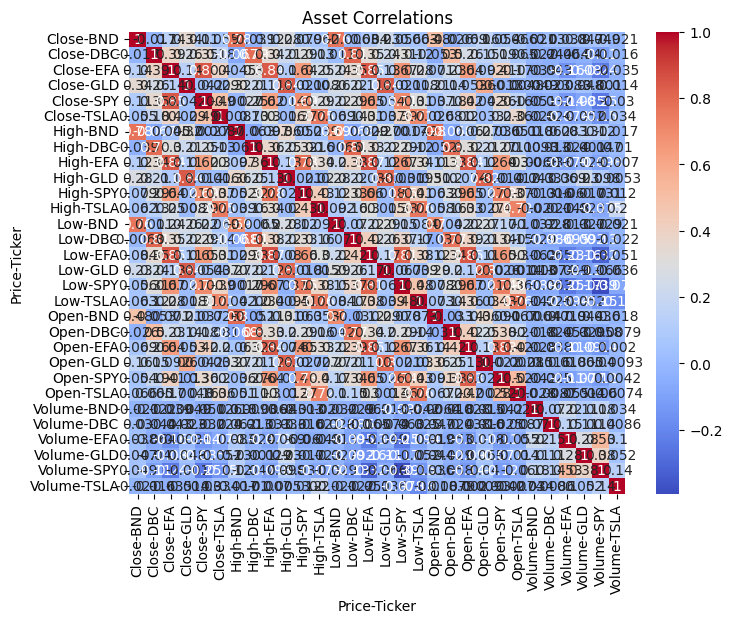

In [20]:
# -----------------------------
# 2. EDA
# -----------------------------
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.title("Adjusted Closing Prices")
plt.legend()
plt.show()

# Daily returns
returns = df.pct_change().dropna()

# Volatility (annualized std dev)
volatility = returns.std() * np.sqrt(252)

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Asset Correlations")
plt.show()



In [21]:
# -----------------------------
# 3. Stationarity Test
# -----------------------------
def adf_test(series, name=""):
    result = adfuller(series.dropna(), autolag="AIC")
    print(f"ADF Test for {name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("-" * 40)

for col in df.columns:
    adf_test(df[col], col)



ADF Test for ('Close', 'BND')
ADF Statistic: -1.3118
p-value: 0.6238
----------------------------------------
ADF Test for ('Close', 'DBC')
ADF Statistic: -0.6822
p-value: 0.8513
----------------------------------------
ADF Test for ('Close', 'EFA')
ADF Statistic: -0.5207
p-value: 0.8879
----------------------------------------
ADF Test for ('Close', 'GLD')
ADF Statistic: 1.6579
p-value: 0.9980
----------------------------------------
ADF Test for ('Close', 'SPY')
ADF Statistic: 0.7539
p-value: 0.9909
----------------------------------------
ADF Test for ('Close', 'TSLA')
ADF Statistic: -1.3910
p-value: 0.5866
----------------------------------------
ADF Test for ('High', 'BND')
ADF Statistic: -1.3094
p-value: 0.6248
----------------------------------------
ADF Test for ('High', 'DBC')
ADF Statistic: -0.7041
p-value: 0.8457
----------------------------------------
ADF Test for ('High', 'EFA')
ADF Statistic: -0.4276
p-value: 0.9054
----------------------------------------
ADF Test for (

MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'DBC'),
            ( 'Close',  'EFA'),
            ( 'Close',  'GLD'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'DBC'),
            (  'High',  'EFA'),
            (  'High',  'GLD'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'DBC'),
            (   'Low',  'EFA'),
            (   'Low',  'GLD'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'DBC'),
            (  'Open',  'EFA'),
            (  'Open',  'GLD'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'DBC'),
            ('Volume',  'EFA'),
            ('Volume',  'GLD'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


d:\GitHub\10acadamy\FinSight-TimeSeries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\10acadamy\FinSight-TimeSeries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\10acadamy\FinSight-TimeSeries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\GitHub\10acadamy\FinSight-TimeSeries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a m

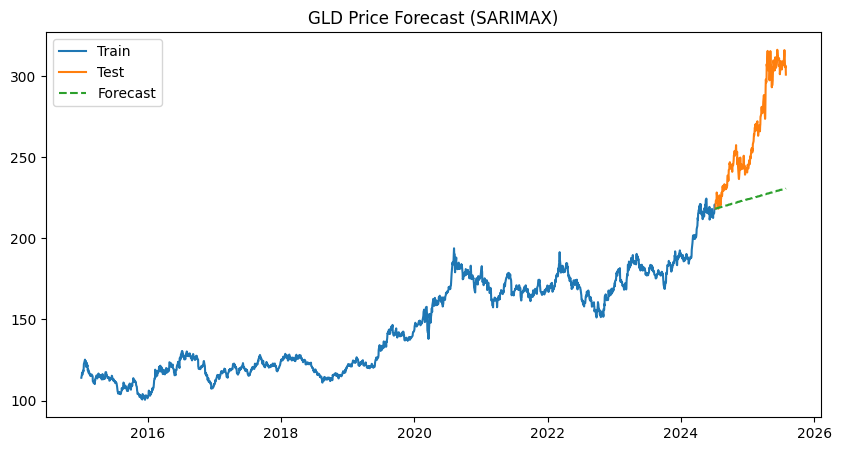

In [25]:
# -----------------------------
# 4. Forecasting Example (GLD)
# -----------------------------
print(df.columns)
gld_series = df['Close', 'GLD']

# Train-test split (last 1 year for test)
train_size = int(len(gld_series) * 0.9)
train, test = gld_series.iloc[:train_size], gld_series.iloc[train_size:]

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), 
                enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

# Forecast
forecast = fitted_model.forecast(steps=len(test))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast, label="Forecast", linestyle="--")
plt.title("GLD Price Forecast (SARIMAX)")
plt.legend()
plt.show()

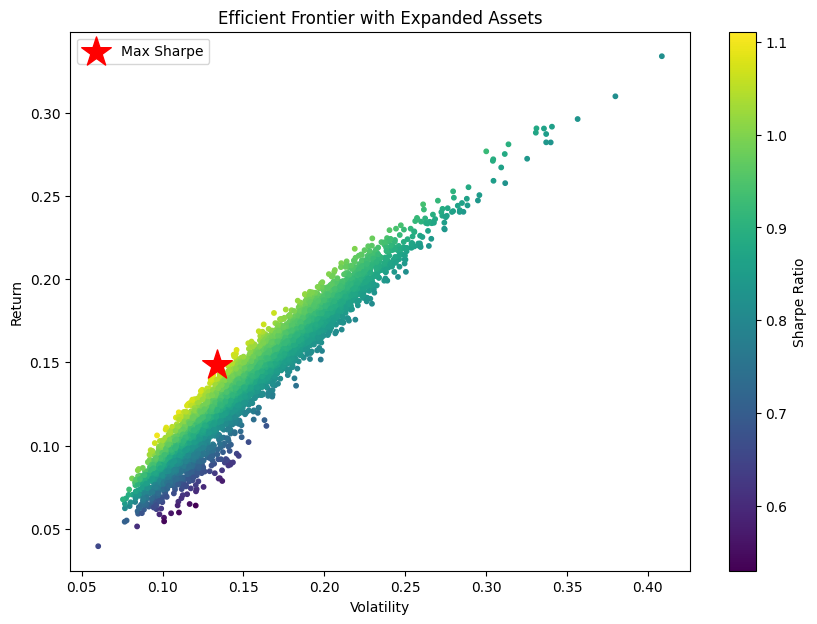

Max Sharpe Ratio Portfolio Weights:
TSLA: 1.88%
BND: 1.04%
SPY: 4.96%
GLD: 57.16%
EFA: 23.70%
DBC: 11.25%


In [30]:
# -----------------------------
# 5. Portfolio Optimization (Expanded Assets)
# -----------------------------
mean_returns = returns.mean()
cov_matrix = returns.cov()

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = returns / std
    return returns, std, sharpe_ratio

# Filter mean_returns and cov_matrix to include only 'Close' prices
mean_returns = mean_returns['Close']
cov_matrix = cov_matrix.loc['Close', 'Close']

# Random portfolios
n_portfolios = 5000
results = np.zeros((3, n_portfolios))
weights_record = []

for i in range(n_portfolios):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)  # Normalize weights
    weights_record.append(weights)
    portfolio_return, portfolio_std, sharpe = portfolio_performance(weights, mean_returns, cov_matrix)
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
sdp_max, rp_max = results[1, max_sharpe_idx], results[0, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

# Plot the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap="viridis", marker="o", s=10)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(sdp_max, rp_max, marker="*", color="r", s=500, label="Max Sharpe")
plt.title("Efficient Frontier with Expanded Assets")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.legend()
plt.show()

# Print the portfolio weights with the maximum Sharpe ratio
print("Max Sharpe Ratio Portfolio Weights:")
for asset, weight in zip(assets, max_sharpe_weights):
    print(f"{asset}: {weight:.2%}")